# AI Benchmark Analysis

This notebook analyzes the results of 100 simulated games between the Old AI (Baseline) and the New AI (Enhanced).

## Setup
Loading necessary libraries and the benchmark results.

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 12

# Load results
try:
    with open('benchmark_results.json', 'r') as f:
        raw_data = json.load(f)

    # Process data into a DataFrame
    games = []
    moves = []

    for game in raw_data:
        # Determine Phase
        # Phase 1: Old AI (Red) vs New AI (Black) -> red_ai == 'minimax'
        # Phase 2: New AI (Red) vs Old AI (Black) -> red_ai == 'iterative_deepening'
        phase = 1 if game['red_ai'] == 'minimax' else 2
        
        winner_ai = "Draw"
        if game['winner'] == 'RED':
            winner_ai = "Old AI" if phase == 1 else "New AI"
        elif game['winner'] == 'BLACK':
            winner_ai = "New AI" if phase == 1 else "Old AI"
            
        # Calculate average move times per AI for this game
        red_moves = [m['duration'] for m in game['moves'] if m['turn'] == 'RED']
        black_moves = [m['duration'] for m in game['moves'] if m['turn'] == 'BLACK']
        
        avg_red_time = sum(red_moves) / len(red_moves) if red_moves else 0
        avg_black_time = sum(black_moves) / len(black_moves) if black_moves else 0
        
        new_ai_avg_time = avg_black_time if phase == 1 else avg_red_time
        old_ai_avg_time = avg_red_time if phase == 1 else avg_black_time

        games.append({
            'game_id': game['game_id'],
            'phase': phase,
            'red_ai': game['red_ai'],
            'black_ai': game['black_ai'],
            'winner': game['winner'],
            'winner_ai': winner_ai,
            'total_moves': len(game['moves']),
            'game_time': sum(m['duration'] for m in game['moves']),
            'new_ai_avg_move_time': new_ai_avg_time,
            'old_ai_avg_move_time': old_ai_avg_time
        })
        
        # Move level data
        for move in game['moves']:
            # Determine AI name for this move
            is_red_turn = move['turn'] == 'RED'
            if phase == 1:
                ai_name = "Old AI" if is_red_turn else "New AI"
            else:
                ai_name = "New AI" if is_red_turn else "Old AI"
                
            moves.append({
                'game_id': game['game_id'],
                'phase': phase,
                'turn': move['turn'],
                'ai_name': ai_name,
                'duration': move['duration'],
                'move_count': move['move_count']
            })

    df_games = pd.DataFrame(games)
    df_moves = pd.DataFrame(moves)

    print(f"Loaded {len(df_games)} games and {len(df_moves)} moves.")
    display(df_games.head())
except FileNotFoundError:
    print("benchmark_results.json not found. Please run benchmark.py first.")

Loaded 100 games and 50 moves.


,game_id,phase,red_ai,black_ai,winner,winner_ai,total_moves,game_time,new_ai_avg_move_time,old_ai_avg_move_time
0,1,1,minimax,iterative_deepening,RED,Old AI,1,0.017431,0,0.017431
1,2,1,minimax,iterative_deepening,RED,Old AI,1,0.016625,0,0.016625
2,3,1,minimax,iterative_deepening,RED,Old AI,1,0.017452,0,0.017452
3,4,1,minimax,iterative_deepening,RED,Old AI,1,0.019217,0,0.019217
4,5,1,minimax,iterative_deepening,RED,Old AI,1,0.021200,0,0.021200


## Overall Win Rate

OVERALL RESULTS
Total Games: 100

New AI Wins: 0 (0.0%)
Old AI Wins: 100 (100.0%)
Draws: 0 (0.0%)


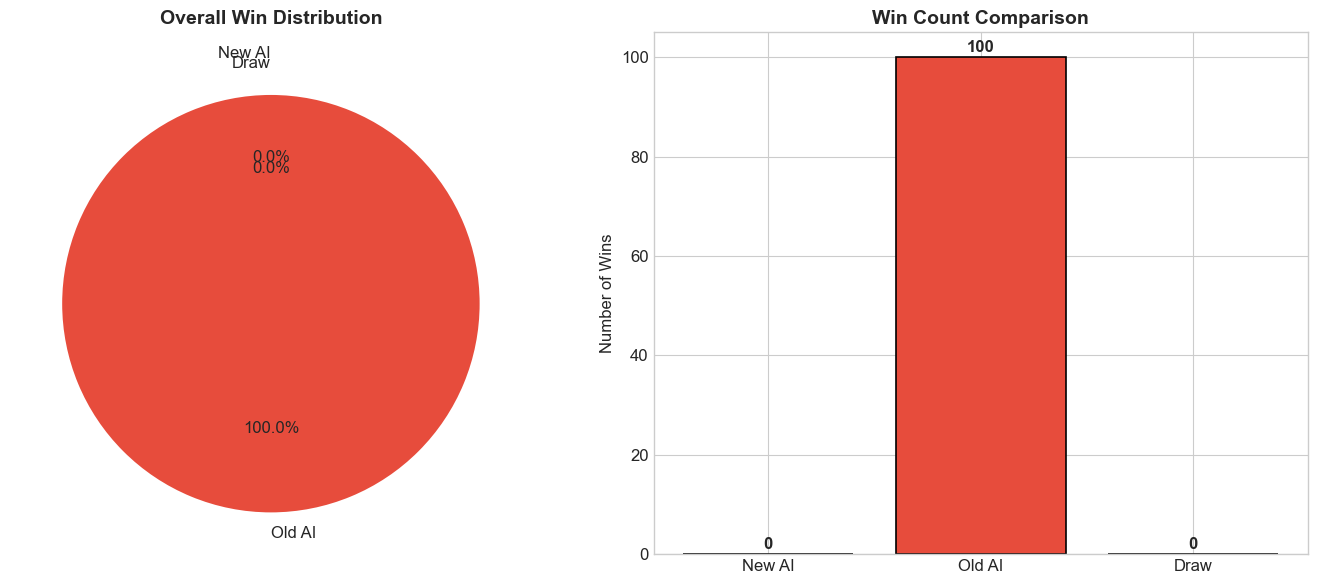

In [2]:
if 'df_games' in locals():
    win_counts = df_games['winner_ai'].value_counts()
    total_games = len(df_games)

    new_ai_wins = win_counts.get('New AI', 0)
    old_ai_wins = win_counts.get('Old AI', 0)
    draws = win_counts.get('Draw', 0)

    print("=" * 50)
    print("OVERALL RESULTS")
    print("=" * 50)
    print(f"Total Games: {total_games}")
    print(f"\nNew AI Wins: {new_ai_wins} ({new_ai_wins/total_games*100:.1f}%)")
    print(f"Old AI Wins: {old_ai_wins} ({old_ai_wins/total_games*100:.1f}%)")
    print(f"Draws: {draws} ({draws/total_games*100:.1f}%)")
    print("=" * 50)

    colors = ['#2ecc71', '#e74c3c', '#95a5a6']
    labels = ['New AI', 'Old AI', 'Draw']
    sizes = [new_ai_wins, old_ai_wins, draws]

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    wedges, texts, autotexts = axes[0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
                                            startangle=90, explode=(0.05, 0.05, 0))
    axes[0].set_title('Overall Win Distribution', fontsize=14, fontweight='bold')

    x = np.arange(len(labels))
    bars = axes[1].bar(x, sizes, color=colors, edgecolor='black', linewidth=1.2)
    axes[1].set_xticks(x)
    axes[1].set_xticklabels(labels)
    axes[1].set_ylabel('Number of Wins')
    axes[1].set_title('Win Count Comparison', fontsize=14, fontweight='bold')

    for bar, size in zip(bars, sizes):
        axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                     str(size), ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()
else:
    print("Data not loaded.")

## Phase Analysis

Compare performance when each AI plays first.

PHASE 1: New AI Plays First
Games: 50
New AI Wins: 0 (0.0%)
Old AI Wins: 50 (100.0%)
Draws: 0 (0.0%)

PHASE 2: Old AI Plays First
Games: 50
New AI Wins: 0 (0.0%)
Old AI Wins: 50 (100.0%)
Draws: 0 (0.0%)


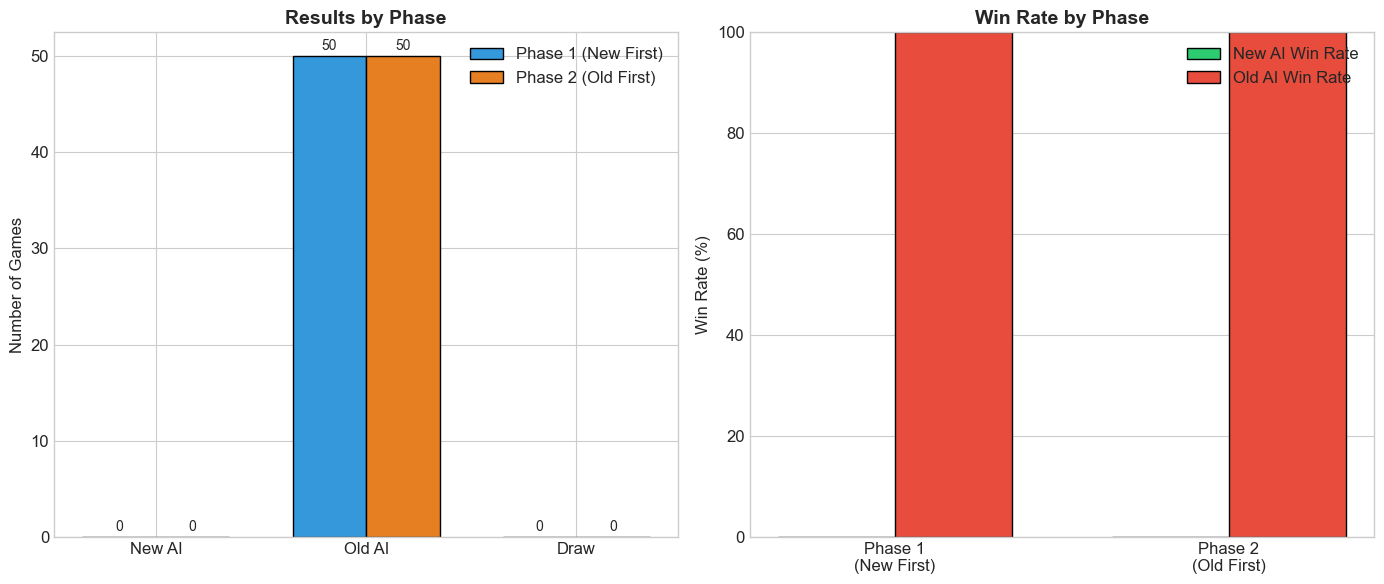

In [3]:
if 'df_games' in locals():
    phase1_df = df_games[df_games['phase'] == 1]
    phase2_df = df_games[df_games['phase'] == 2]

    phase1_wins = phase1_df['winner_ai'].value_counts()
    phase2_wins = phase2_df['winner_ai'].value_counts()

    print("=" * 50)
    print("PHASE 1: New AI Plays First")
    print("=" * 50)
    print(f"Games: {len(phase1_df)}")
    print(f"New AI Wins: {phase1_wins.get('New AI', 0)} ({phase1_wins.get('New AI', 0)/len(phase1_df)*100:.1f}%)")
    print(f"Old AI Wins: {phase1_wins.get('Old AI', 0)} ({phase1_wins.get('Old AI', 0)/len(phase1_df)*100:.1f}%)")
    print(f"Draws: {phase1_wins.get('Draw', 0)} ({phase1_wins.get('Draw', 0)/len(phase1_df)*100:.1f}%)")

    print("\n" + "=" * 50)
    print("PHASE 2: Old AI Plays First")
    print("=" * 50)
    print(f"Games: {len(phase2_df)}")
    print(f"New AI Wins: {phase2_wins.get('New AI', 0)} ({phase2_wins.get('New AI', 0)/len(phase2_df)*100:.1f}%)")
    print(f"Old AI Wins: {phase2_wins.get('Old AI', 0)} ({phase2_wins.get('Old AI', 0)/len(phase2_df)*100:.1f}%)")
    print(f"Draws: {phase2_wins.get('Draw', 0)} ({phase2_wins.get('Draw', 0)/len(phase2_df)*100:.1f}%)")

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    categories = ['New AI', 'Old AI', 'Draw']
    phase1_values = [phase1_wins.get('New AI', 0), phase1_wins.get('Old AI', 0), phase1_wins.get('Draw', 0)]
    phase2_values = [phase2_wins.get('New AI', 0), phase2_wins.get('Old AI', 0), phase2_wins.get('Draw', 0)]

    x = np.arange(len(categories))
    width = 0.35

    bars1 = axes[0].bar(x - width/2, phase1_values, width, label='Phase 1 (New First)', color='#3498db', edgecolor='black')
    bars2 = axes[0].bar(x + width/2, phase2_values, width, label='Phase 2 (Old First)', color='#e67e22', edgecolor='black')

    axes[0].set_xticks(x)
    axes[0].set_xticklabels(categories)
    axes[0].set_ylabel('Number of Games')
    axes[0].set_title('Results by Phase', fontsize=14, fontweight='bold')
    axes[0].legend()

    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            axes[0].text(bar.get_x() + bar.get_width()/2, height + 0.3, str(int(height)), 
                         ha='center', va='bottom', fontsize=10)

    phase1_new_rate = phase1_wins.get('New AI', 0) / len(phase1_df) * 100 if len(phase1_df) > 0 else 0
    phase2_new_rate = phase2_wins.get('New AI', 0) / len(phase2_df) * 100 if len(phase2_df) > 0 else 0
    phase1_old_rate = phase1_wins.get('Old AI', 0) / len(phase1_df) * 100 if len(phase1_df) > 0 else 0
    phase2_old_rate = phase2_wins.get('Old AI', 0) / len(phase2_df) * 100 if len(phase2_df) > 0 else 0

    phases = ['Phase 1\n(New First)', 'Phase 2\n(Old First)']
    new_rates = [phase1_new_rate, phase2_new_rate]
    old_rates = [phase1_old_rate, phase2_old_rate]

    x2 = np.arange(len(phases))
    axes[1].bar(x2 - width/2, new_rates, width, label='New AI Win Rate', color='#2ecc71', edgecolor='black')
    axes[1].bar(x2 + width/2, old_rates, width, label='Old AI Win Rate', color='#e74c3c', edgecolor='black')

    axes[1].set_xticks(x2)
    axes[1].set_xticklabels(phases)
    axes[1].set_ylabel('Win Rate (%)')
    axes[1].set_title('Win Rate by Phase', fontsize=14, fontweight='bold')
    axes[1].legend()
    axes[1].set_ylim(0, 100)

    plt.tight_layout()
    plt.show()
else:
    print("Data not loaded.")

## Game Time Analysis

GAME TIME STATISTICS
Overall Average Game Time: 0.01 seconds
Phase 1 Average Game Time: 0.02 seconds
Phase 2 Average Game Time: 0.00 seconds

Min Game Time: 0.00 seconds
Max Game Time: 0.03 seconds
Std Dev: 0.01 seconds


C:\Users\paaar\AppData\Local\Temp\ipykernel_33064\2810320727.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1].boxplot([phase1_df['game_time'], phase2_df['game_time']],


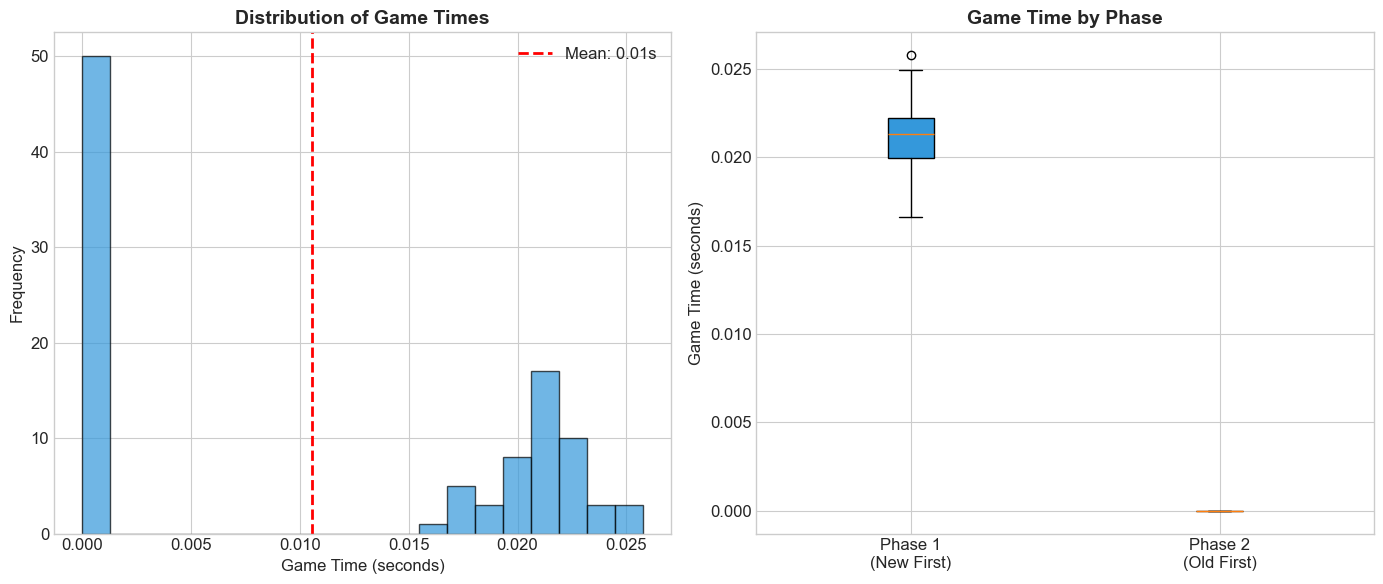

In [4]:
if 'df_games' in locals():
    avg_game_time = df_games['game_time'].mean()
    avg_game_time_phase1 = phase1_df['game_time'].mean()
    avg_game_time_phase2 = phase2_df['game_time'].mean()

    print("=" * 50)
    print("GAME TIME STATISTICS")
    print("=" * 50)
    print(f"Overall Average Game Time: {avg_game_time:.2f} seconds")
    print(f"Phase 1 Average Game Time: {avg_game_time_phase1:.2f} seconds")
    print(f"Phase 2 Average Game Time: {avg_game_time_phase2:.2f} seconds")
    print(f"\nMin Game Time: {df_games['game_time'].min():.2f} seconds")
    print(f"Max Game Time: {df_games['game_time'].max():.2f} seconds")
    print(f"Std Dev: {df_games['game_time'].std():.2f} seconds")

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    axes[0].hist(df_games['game_time'], bins=20, color='#3498db', edgecolor='black', alpha=0.7)
    axes[0].axvline(avg_game_time, color='red', linestyle='--', linewidth=2, label=f'Mean: {avg_game_time:.2f}s')
    axes[0].set_xlabel('Game Time (seconds)')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Distribution of Game Times', fontsize=14, fontweight='bold')
    axes[0].legend()

    bp = axes[1].boxplot([phase1_df['game_time'], phase2_df['game_time']], 
                         labels=['Phase 1\n(New First)', 'Phase 2\n(Old First)'],
                         patch_artist=True)
    for box in bp['boxes']:
        box.set_facecolor('#3498db')
    bp['boxes'][1].set_facecolor('#e67e22')
    axes[1].set_ylabel('Game Time (seconds)')
    axes[1].set_title('Game Time by Phase', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()
else:
    print("Data not loaded.")

## Move Time Analysis

MOVE TIME STATISTICS (milliseconds)

Overall Average Move Time:
  New AI: 0.00 ms
  Old AI: 10.55 ms

Phase 1 (New AI First):
  New AI: 0.00 ms
  Old AI: 21.11 ms

Phase 2 (Old AI First):
  New AI: 0.00 ms
  Old AI: 0.00 ms


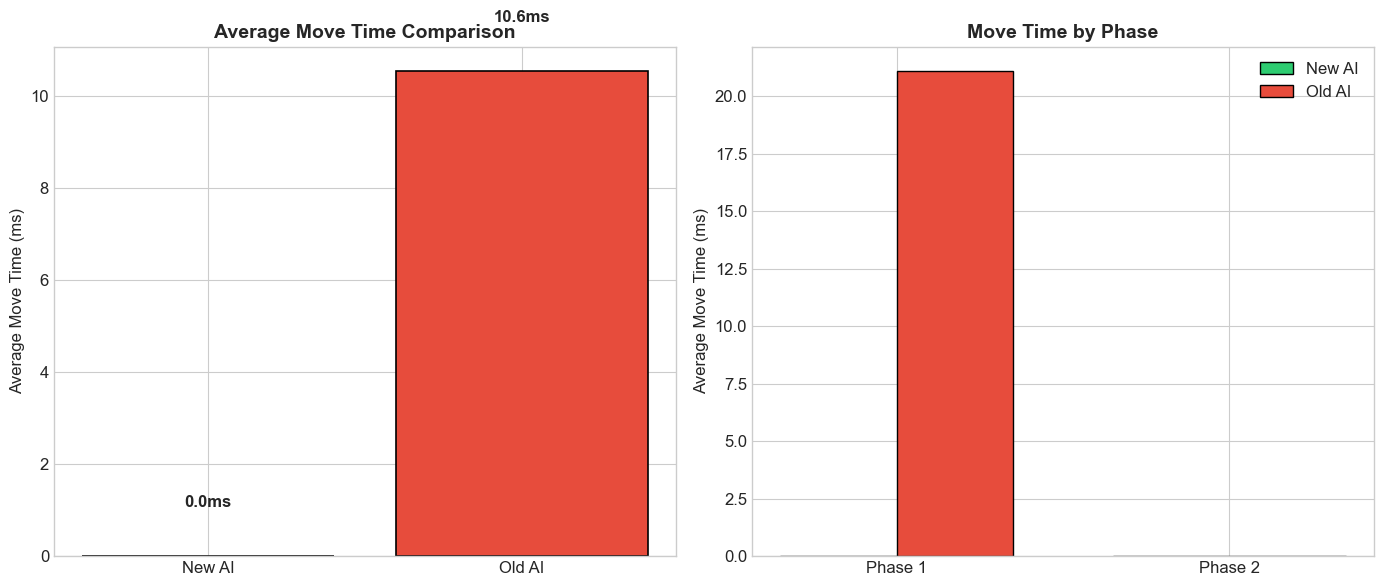

In [5]:
if 'df_games' in locals():
    avg_new_move_time = df_games['new_ai_avg_move_time'].mean() * 1000
    avg_old_move_time = df_games['old_ai_avg_move_time'].mean() * 1000

    phase1_new_move_time = phase1_df['new_ai_avg_move_time'].mean() * 1000
    phase1_old_move_time = phase1_df['old_ai_avg_move_time'].mean() * 1000
    phase2_new_move_time = phase2_df['new_ai_avg_move_time'].mean() * 1000
    phase2_old_move_time = phase2_df['old_ai_avg_move_time'].mean() * 1000

    print("=" * 50)
    print("MOVE TIME STATISTICS (milliseconds)")
    print("=" * 50)
    print(f"\nOverall Average Move Time:")
    print(f"  New AI: {avg_new_move_time:.2f} ms")
    print(f"  Old AI: {avg_old_move_time:.2f} ms")
    print(f"\nPhase 1 (New AI First):")
    print(f"  New AI: {phase1_new_move_time:.2f} ms")
    print(f"  Old AI: {phase1_old_move_time:.2f} ms")
    print(f"\nPhase 2 (Old AI First):")
    print(f"  New AI: {phase2_new_move_time:.2f} ms")
    print(f"  Old AI: {phase2_old_move_time:.2f} ms")

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    ais = ['New AI', 'Old AI']
    times = [avg_new_move_time, avg_old_move_time]
    colors_bar = ['#2ecc71', '#e74c3c']

    bars = axes[0].bar(ais, times, color=colors_bar, edgecolor='black', linewidth=1.2)
    axes[0].set_ylabel('Average Move Time (ms)')
    axes[0].set_title('Average Move Time Comparison', fontsize=14, fontweight='bold')

    for bar, time_val in zip(bars, times):
        axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                     f'{time_val:.1f}ms', ha='center', va='bottom', fontweight='bold')

    phases_labels = ['Phase 1', 'Phase 2']
    x = np.arange(len(phases_labels))
    width = 0.35

    new_times = [phase1_new_move_time, phase2_new_move_time]
    old_times = [phase1_old_move_time, phase2_old_move_time]

    axes[1].bar(x - width/2, new_times, width, label='New AI', color='#2ecc71', edgecolor='black')
    axes[1].bar(x + width/2, old_times, width, label='Old AI', color='#e74c3c', edgecolor='black')

    axes[1].set_xticks(x)
    axes[1].set_xticklabels(phases_labels)
    axes[1].set_ylabel('Average Move Time (ms)')
    axes[1].set_title('Move Time by Phase', fontsize=14, fontweight='bold')
    axes[1].legend()

    plt.tight_layout()
    plt.show()
else:
    print("Data not loaded.")

## Move Time Progression

Analyze how move times change as the game progresses.

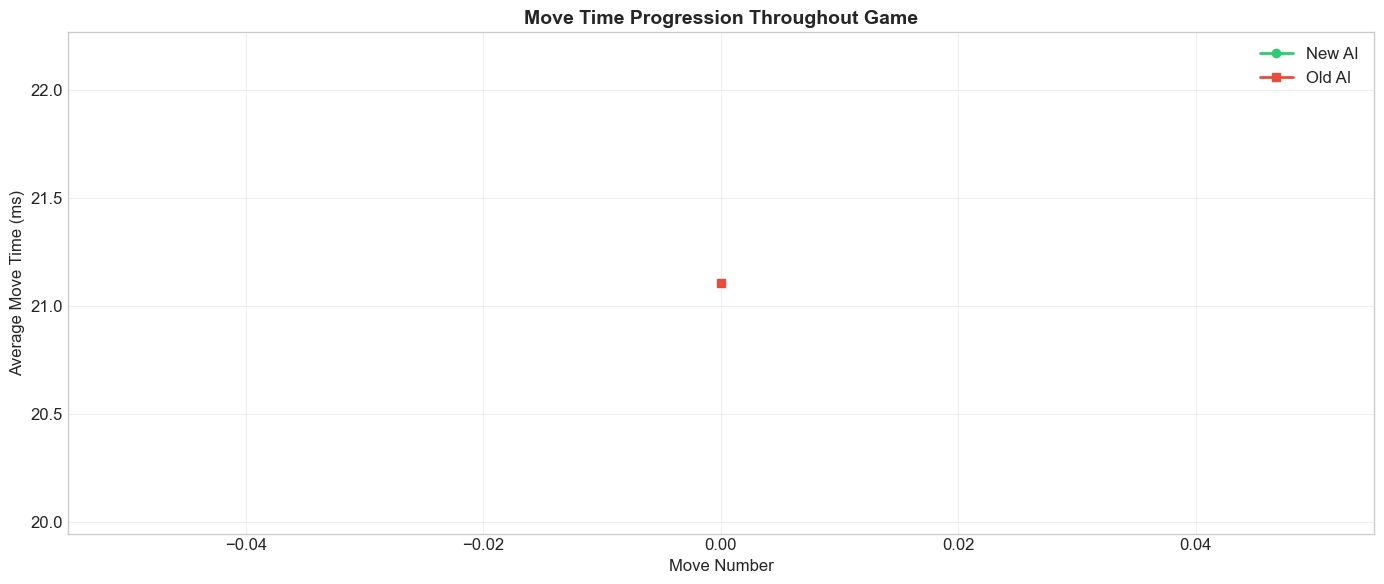

In [6]:
if 'df_moves' in locals():
    new_ai_moves = df_moves[df_moves['ai_name'] == 'New AI']
    old_ai_moves = df_moves[df_moves['ai_name'] == 'Old AI']

    new_move_times_by_num = new_ai_moves.groupby('move_count')['duration'].mean() * 1000
    old_move_times_by_num = old_ai_moves.groupby('move_count')['duration'].mean() * 1000

    fig, ax = plt.subplots(figsize=(14, 6))

    ax.plot(new_move_times_by_num.index, new_move_times_by_num.values, 
            'o-', color='#2ecc71', label='New AI', linewidth=2, markersize=6)
    ax.plot(old_move_times_by_num.index, old_move_times_by_num.values, 
            's-', color='#e74c3c', label='Old AI', linewidth=2, markersize=6)

    ax.set_xlabel('Move Number')
    ax.set_ylabel('Average Move Time (ms)')
    ax.set_title('Move Time Progression Throughout Game', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
else:
    print("Data not loaded.")

## Summary Statistics Table

In [7]:
if 'df_games' in locals():
    summary_data = {
        'Metric': [
            'Total Games',
            'New AI Wins',
            'Old AI Wins', 
            'Draws',
            'New AI Win Rate (%)',
            'Old AI Win Rate (%)',
            'Avg Game Time (s)',
            'Avg New AI Move Time (ms)',
            'Avg Old AI Move Time (ms)',
            'Avg Moves per Game'
        ],
        'Overall': [
            total_games,
            new_ai_wins,
            old_ai_wins,
            draws,
            f'{new_ai_wins/total_games*100:.1f}',
            f'{old_ai_wins/total_games*100:.1f}',
            f'{avg_game_time:.2f}',
            f'{avg_new_move_time:.2f}',
            f'{avg_old_move_time:.2f}',
            f'{df_games["total_moves"].mean():.1f}'
        ],
        'Phase 1 (New First)': [
            len(phase1_df),
            phase1_wins.get('New AI', 0),
            phase1_wins.get('Old AI', 0),
            phase1_wins.get('Draw', 0),
            f'{phase1_wins.get("New AI", 0)/len(phase1_df)*100:.1f}' if len(phase1_df) > 0 else '0.0',
            f'{phase1_wins.get("Old AI", 0)/len(phase1_df)*100:.1f}' if len(phase1_df) > 0 else '0.0',
            f'{avg_game_time_phase1:.2f}',
            f'{phase1_new_move_time:.2f}',
            f'{phase1_old_move_time:.2f}',
            f'{phase1_df["total_moves"].mean():.1f}' if len(phase1_df) > 0 else '0.0'
        ],
        'Phase 2 (Old First)': [
            len(phase2_df),
            phase2_wins.get('New AI', 0),
            phase2_wins.get('Old AI', 0),
            phase2_wins.get('Draw', 0),
            f'{phase2_wins.get("New AI", 0)/len(phase2_df)*100:.1f}' if len(phase2_df) > 0 else '0.0',
            f'{phase2_wins.get("Old AI", 0)/len(phase2_df)*100:.1f}' if len(phase2_df) > 0 else '0.0',
            f'{avg_game_time_phase2:.2f}',
            f'{phase2_new_move_time:.2f}',
            f'{phase2_old_move_time:.2f}',
            f'{phase2_df["total_moves"].mean():.1f}' if len(phase2_df) > 0 else '0.0'
        ]
    }

    summary_df = pd.DataFrame(summary_data)
    
    print("\n" + "=" * 80)
    print("COMPLETE SUMMARY STATISTICS")
    print("=" * 80)
    print(summary_df.to_string(index=False))
    print("=" * 80)
else:
    print("Data not loaded.")


COMPLETE SUMMARY STATISTICS
                   Metric Overall Phase 1 (New First) Phase 2 (Old First)
              Total Games     100                  50                  50
              New AI Wins       0                   0                   0
              Old AI Wins     100                  50                  50
                    Draws       0                   0                   0
      New AI Win Rate (%)     0.0                 0.0                 0.0
      Old AI Win Rate (%)   100.0               100.0               100.0
        Avg Game Time (s)    0.01                0.02                0.00
Avg New AI Move Time (ms)    0.00                0.00                0.00
Avg Old AI Move Time (ms)   10.55               21.11                0.00
       Avg Moves per Game     0.5                 1.0                 0.0


## Conclusion

In [8]:
if 'df_games' in locals():
    print("\n" + "=" * 60)
    print("CONCLUSION")
    print("=" * 60)

    if new_ai_wins > old_ai_wins:
        improvement = (new_ai_wins - old_ai_wins) / max(old_ai_wins, 1) * 100
        print(f"\n>>> NEW AI is STRONGER! <<<")
        print(f"\nThe New AI won {new_ai_wins} games vs {old_ai_wins} for Old AI.")
        print(f"This represents a {improvement:.1f}% improvement in win rate.")
    elif old_ai_wins > new_ai_wins:
        print(f"\n>>> OLD AI performed better <<<")
        print(f"\nThe Old AI won {old_ai_wins} games vs {new_ai_wins} for New AI.")
        print(f"The advanced evaluation may need further tuning.")
    else:
        print(f"\n>>> TIED! <<<")
        print(f"\nBoth AIs won {new_ai_wins} games each.")

    if avg_new_move_time < avg_old_move_time:
        speedup = (avg_old_move_time - avg_new_move_time) / avg_old_move_time * 100
        print(f"\nNew AI is {speedup:.1f}% faster per move on average.")
    else:
        slowdown = (avg_new_move_time - avg_old_move_time) / avg_old_move_time * 100
        print(f"\nNew AI is {slowdown:.1f}% slower per move (due to deeper analysis).")

    print("\n" + "=" * 60)
else:
    print("Data not loaded.")


CONCLUSION

>>> OLD AI performed better <<<

The Old AI won 100 games vs 0 for New AI.
The advanced evaluation may need further tuning.

New AI is 100.0% faster per move on average.

